In [30]:
import os
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from src.utils.load_cfg import ConfigLoader
from src.factories import ModelFactory, LossFactory, InferFactory
from src.loaders.base_loader_factory import BaseDataLoaderFactory
from trainer import train
from tester import test
import itertools
from matplotlib import pyplot as plt
import ipdb
import src.config as cfg
from src.inferences.base_infer import BaseInfer
import glob
import xml.etree.ElementTree as ET
from shutil import copyfile, copytree
import os.path as osp
import pandas as pd
import numpy as np

In [127]:
common_loader_params = {
    'batch_size': train_params['batch_size'],
    'num_workers': 4,
}
dataset_cfg = "configs/dataset_cfgs/aic20_vehicle_reid.yaml"
train_cfg   = "configs/train_cfgs/aic20_t2_trip_dat_aug.yaml"
dataset_name, dataset_params = ConfigLoader.load_dataset_cfg(dataset_cfg)
train_params = ConfigLoader.load_train_cfg(train_cfg)
for trans_dict in train_params['transforms']:
    del train_params['transforms'][trans_dict]['normalize']
    
print(train_params['transforms'])
loader_fact = BaseDataLoaderFactory(dataset_name, dataset_params, train_params, common_loader_params)
train_val_loaders = loader_fact.train_val_loaders()

{'base': {'resize': {'size': [320, 320]}, 'center_crop': {'size': 280}, 'to_tensor': None}}


In [128]:
train_val_loaders = loader_fact.train_val_loaders()
train_loader = train_val_loaders['query']
run_iter = 1 * len(train_loader)
diter = itertools.cycle(train_loader)

In [129]:
imgs, lbs = next(diter)
imgs = imgs.permute(0,2,3,1).cpu().detach().numpy()
lbs

tensor([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10,
        11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
        22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26,
        26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31,
        31, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36,
        36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37,
        38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 42, 42, 42,
        42, 42, 42, 43, 43, 43, 44, 44, 

In [74]:
#

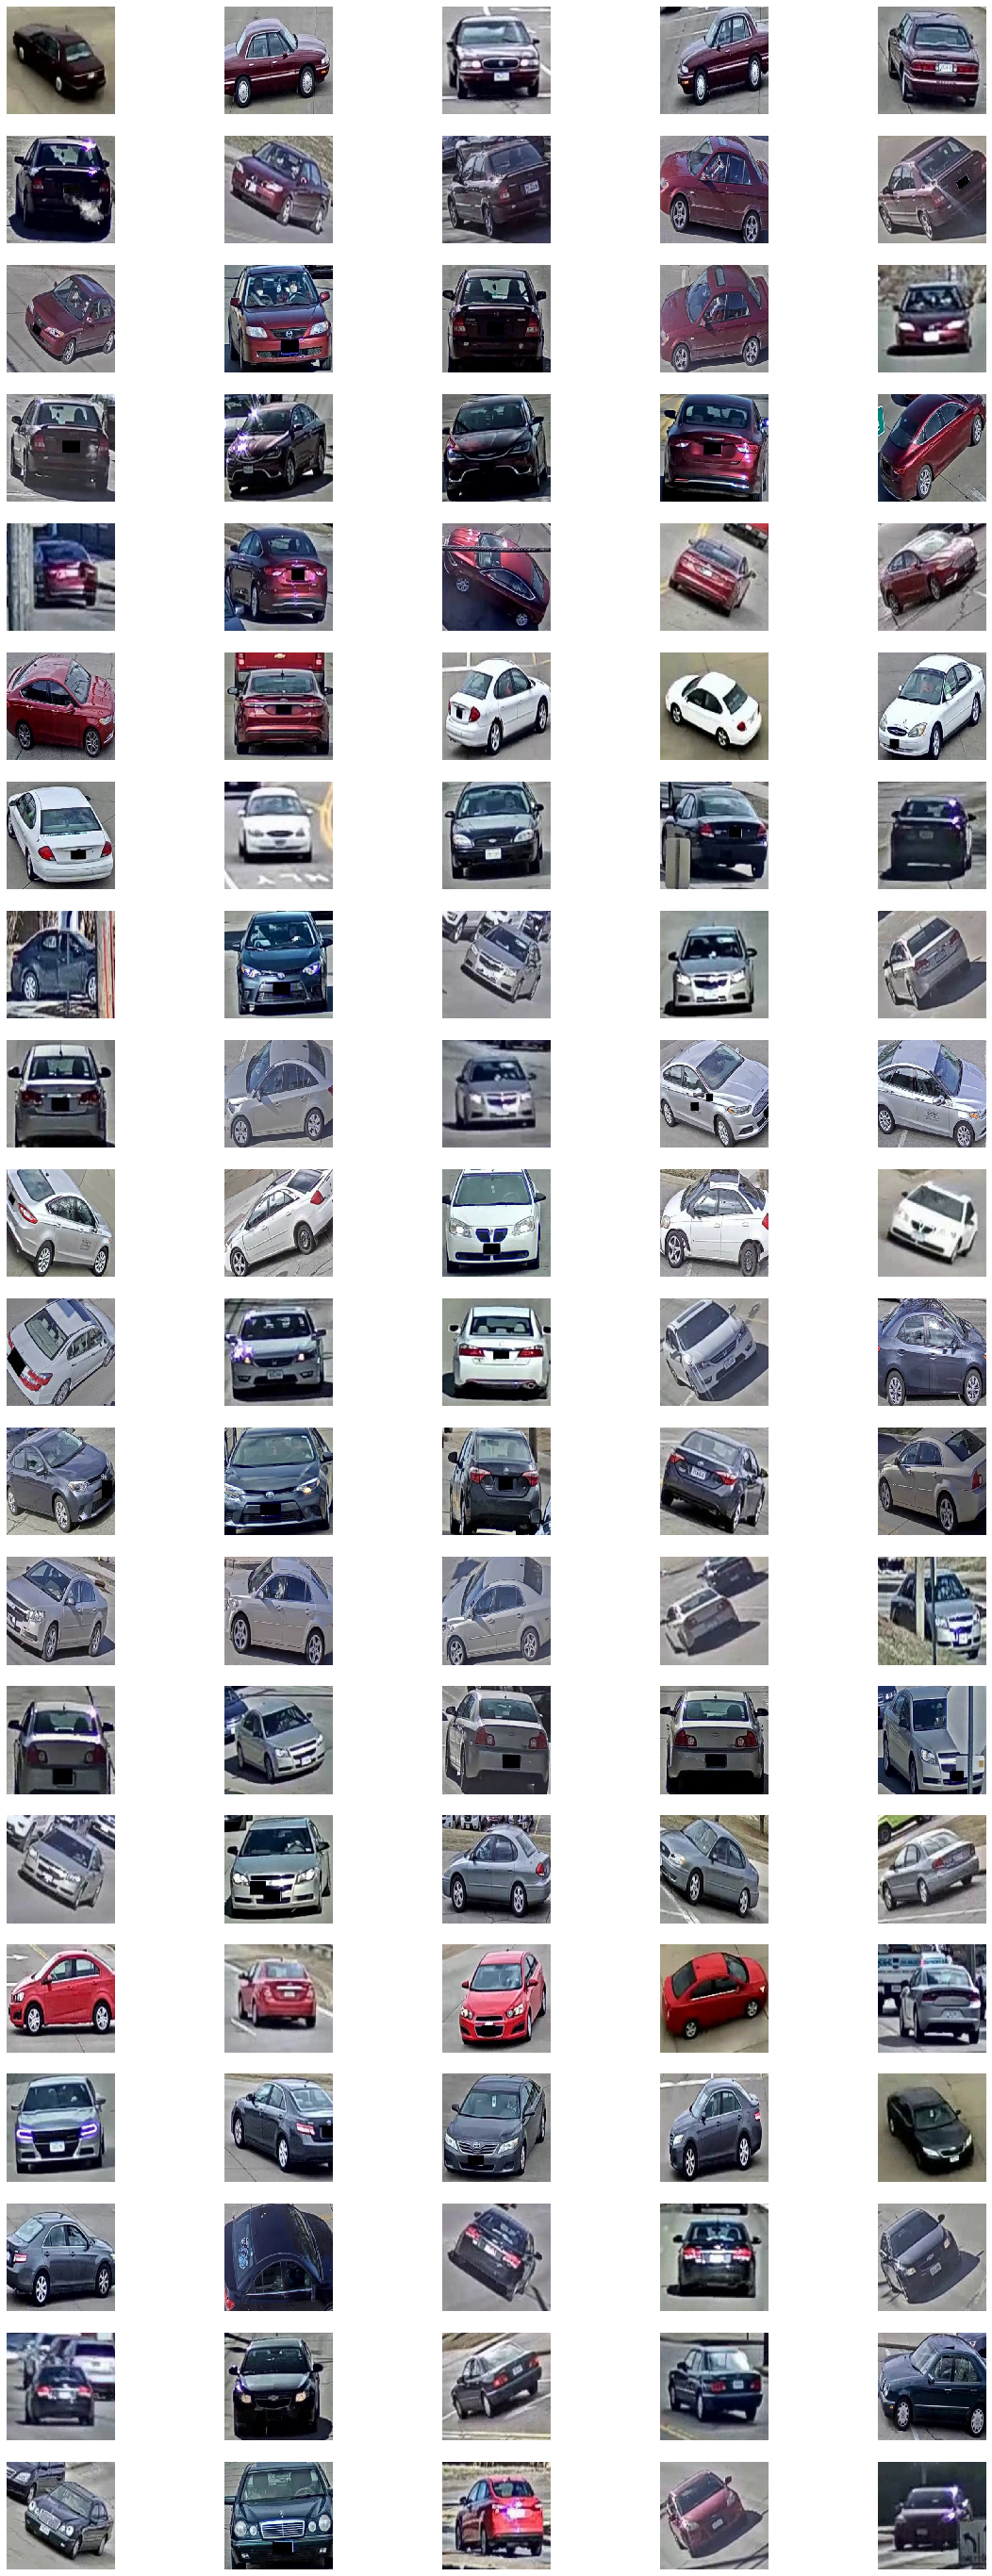

In [130]:
m,n = 20,5
fig, ax = plt.subplots(nrows=m, ncols=n, sharex=True, sharey=True,figsize=(m, n * 10))
for idx in range(m):    
    for jdx in range(n):
        img_npy = imgs[idx * n + jdx]
        ax[idx,jdx].axis("off")
#         ax[idx,jdx].axis("tight")
        ax[idx,jdx].imshow(img_npy)